In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.preprocessing import scale,StandardScaler
from sklearn import metrics

In [3]:
data=pd.read_csv("data/train.csv")
# data=data.sample(100)
data.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,15.46,11.89,102.50,736.9,0.12570,0.15550,0.20320,0.10970,0.1966,0.07069,...,17.04,125.00,1102.0,0.15310,0.3583,0.5830,0.18270,0.3216,0.10100,0
1,12.85,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,0.1580,0.06114,...,27.01,91.63,645.8,0.09402,0.1936,0.1838,0.05601,0.2488,0.08151,1
2,19.21,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.08994,0.1917,0.05961,...,28.14,170.10,2145.0,0.16240,0.3511,0.3879,0.20910,0.3537,0.08294,0
3,12.47,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,0.1526,0.06046,...,24.34,92.82,607.3,0.12760,0.2506,0.2028,0.10530,0.3035,0.07661,1
4,12.46,19.89,80.43,471.3,0.08451,0.10140,0.06830,0.03099,0.1781,0.06249,...,23.07,88.13,551.3,0.10500,0.2158,0.1904,0.07625,0.2685,0.07764,1


In [4]:
X=data.drop(['label'],axis=1)
# X.insert(0,'bias',1)
scaler=StandardScaler().fit(X)
X_s=scaler.transform(X)
X=pd.DataFrame(X_s,columns=X.columns)
X.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.355820,-1.726647,0.413031,0.206435,2.150290,1.003954,1.447046,1.593877,0.595127,1.105740,...,0.511028,-1.409852,0.521794,0.373935,0.921112,0.722973,1.571401,1.056523,0.518443,0.989255
1,-0.373267,0.508813,-0.394700,-0.404509,-1.487959,-0.396650,-0.351529,-0.789623,-0.829284,-0.209972,...,-0.392232,0.241384,-0.473485,-0.414070,-1.632042,-0.371199,-0.432654,-0.896674,-0.632367,-0.114696
2,1.403358,-0.151449,1.347999,1.346734,0.671504,0.446346,0.548645,1.076488,0.414308,-0.420762,...,2.023321,0.428535,1.866926,2.175532,1.323014,0.675140,0.591964,1.463535,1.025874,-0.033698
3,-0.479417,-0.448568,-0.483319,-0.499007,-0.489778,-0.529469,-0.670468,-0.658181,-1.028554,-0.303656,...,-0.462189,-0.200822,-0.437993,-0.480572,-0.180875,0.007476,-0.337271,-0.136763,0.232321,-0.392242
4,-0.482211,0.159817,-0.484132,-0.523181,-0.835553,-0.043498,-0.262323,-0.467040,-0.087557,-0.023982,...,-0.585641,-0.411160,-0.577874,-0.577302,-1.157539,-0.223715,-0.399521,-0.584631,-0.320953,-0.333900


In [5]:
Y=data['label']
Y.head(5)

0    0
1    1
2    0
3    1
4    1
Name: label, dtype: int64

In [6]:
#开始构造梯度下降函数
def gradient_descent(x,y,alpha,threshold,maxIter):
    cnt=0
    loss={}
    (samples,feats)=x.shape
    x = np.array(x).reshape(samples,feats)
    # 初始化参数为 0
    theta = np.zeros((x.shape[1],1))
    y=np.array(y).reshape(samples,1)
    gradient=gradient_func(x,y,theta,cnt)
    error=errors_func(x,y,theta)
    loss[cnt]=error[0][0]
    while not np.all(np.absolute(gradient) <= threshold) and cnt<maxIter:
        cnt=cnt+1
        theta=theta-alpha*gradient
        gradient=gradient_func(x,y,theta,cnt)
        error=errors_func(x,y,theta)
        loss[cnt]=error[0][0]
    print('迭代到第{}次，结束迭代！'.format(cnt))
    #画出loss函数
    print(loss)
    lossdf=pd.DataFrame.from_dict(loss,orient='index')
    #plt.scatter(lossdf.index,lossdf)
    plt.plot(lossdf)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend(labels=['loss'])
    plt.show()
    return theta,lossdf
    
#计算梯度,利用之前推导的理论
def gradient_func(x,y,theta,cnt):
    z=np.dot(x,theta)
    z=normalize(z)
    diff=sigmoid(z)-y
    grad=np.dot(x.T,diff)/y.shape[0]
    return grad

#计算极大似然损失
def errors_func(x,y,theta):
    z=np.dot(x,theta)
    z=normalize(z)
    error=(-1.0)*(np.dot(y.T,np.log(sigmoid(z)))+np.dot((1.0-y).T,np.log(1.0-sigmoid(z))))/y.shape[0]
    return error

#sigmoid函数
# def sigmoid(z):
#     res=np.zeros((z.shape))
#     for i in range(z.shape[0]):
#         if z[i][0]>=0:
#             res[i][0]=np.exp(-z[i][0])
#         else:
#             res[i][0]=np.exp(z[i][0])/(1.0+np.exp(z[i][0]))
#     return res

#sigmoid函数
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

#归一化z，防止向上、向下溢出
def normalize(z):
    if np.unique(z).shape[0]>1:
        print(np.max(z),np.min(z))
        z=(z-np.min(z))/(np.max(z)-np.min(z))
    return z

0.769430138723692 -2.216129398005476
0.769430138723692 -2.216129398005476
1.4666305577285694 -4.214828356926846
1.4666305577285694 -4.214828356926846
2.1637901904168864 -6.2134232449392846
2.1637901904168864 -6.2134232449392846
2.8609346910465763 -8.211980145146603
2.8609346910465763 -8.211980145146603
3.5580712795753935 -10.210517333364018
3.5580712795753935 -10.210517333364018
4.255202995756257 -12.209042441607407
4.255202995756257 -12.209042441607407
4.952331406246878 -14.207559382954377
4.952331406246878 -14.207559382954377
5.649457424937849 -16.206070431463456
5.649457424937849 -16.206070431463456
6.346581631766376 -18.20457702597646
6.346581631766376 -18.20457702597646
7.0437044179580965 -20.203080134814805
7.0437044179580965 -20.203080134814805
7.740826059999162 -22.201580440931437
7.740826059999162 -22.201580440931437
8.437946760571581 -24.200078444106897
8.437946760571581 -24.200078444106897
9.135066672713462 -26.198574521134958
9.135066672713462 -26.198574521134958
9.83218591

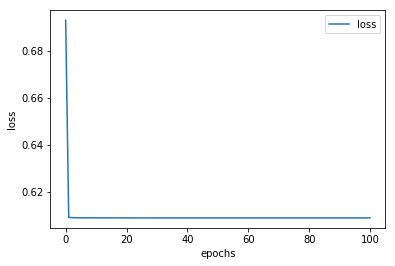

In [7]:
thresh=0.01
alpha=0.1
maxIter=100
theta,lossdf=gradient_descent(X,Y,alpha,thresh,maxIter)

In [8]:
#进行预测,并获取最佳的阈值
def get_threshold(x,y,theta):
    z=np.dot(x,theta)
    z=normalize(z)
    y_0=1.0-sigmoid(z)
    y_1=1.0-y_0
    tpr,fpr,threshold=metrics.roc_curve(y,y_1)
    resY=pd.DataFrame(np.concatenate([y_0,y_1],axis=1),columns=['prob_0','prob_1'])
    #print(tpr,fpr,threshold)
    accuracy_ls=[]
    for thre in threshold:
        y_pred=np.where(y_1>thre,1,0)
        accuracy_ls.append(metrics.accuracy_score(y,y_pred))
    print(accuracy_ls)
    maxIndex=np.argmax(accuracy_ls)
    print(threshold[maxIndex])
    return resY,threshold[maxIndex]

resY,thresh=get_threshold(X,Y,theta)

#进行预测
def predict(x,theta,threshold):
    z=np.dot(x,theta)
    z=normalize(z)
    y_1=sigmoid(z)
    y_pred=np.where(y_1>threshold,1,0)
    return y_pred

69.78394569210364 -200.06639192041794
[0.3805774278215223, 0.6587926509186351, 0.6614173228346457, 0.8136482939632546, 0.8162729658792651, 0.8188976377952756, 0.821522309711286, 0.8503937007874016, 0.8530183727034121, 0.8661417322834646, 0.868766404199475, 0.9081364829396326, 0.910761154855643, 0.916010498687664, 0.9186351706036745, 0.926509186351706, 0.9291338582677166, 0.9343832020997376, 0.937007874015748, 0.9343832020997376, 0.9343832020997376, 0.937007874015748, 0.9396325459317585, 0.937007874015748, 0.9396325459317585, 0.937007874015748, 0.9396325459317585, 0.9396325459317585, 0.9422572178477691, 0.9396325459317585, 0.9396325459317585, 0.937007874015748, 0.937007874015748, 0.9343832020997376, 0.9343832020997376, 0.931758530183727, 0.9343832020997376, 0.931758530183727, 0.926509186351706, 0.9238845144356955, 0.8766404199475065, 0.8740157480314961, 0.7952755905511811, 0.7926509186351706, 0.6220472440944882]
0.6737187537457061


# 测试数据的预测,评估模型的质量

In [9]:
test=pd.read_csv('data/test.csv')
test.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750,1
1,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,0.05461,...,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589,0
2,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,0.05796,...,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019,0
3,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,0.07102,...,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359,1
4,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,0.1818,0.06782,...,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134,1


In [10]:
testX=test.drop(['label'],axis=1)
# testX.insert(0,'bias',1)
testX_s=scaler.transform(testX)
testX=pd.DataFrame(testX_s,columns=testX.columns)
testX.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-0.479417,-0.144375,-0.457302,-0.494063,0.261938,0.041693,-0.113434,-0.277994,0.443830,0.146854,...,-0.274952,-0.151136,-0.341656,-0.358623,0.467353,-0.077559,-0.014474,-0.195349,0.199125,0.224589
1,1.327935,0.494665,1.270763,1.286299,-0.431061,-0.014456,0.240731,0.803392,-0.821904,-1.109616,...,1.759956,0.170167,1.741659,1.693609,-0.539562,-0.105462,-0.006441,0.997938,-0.532778,-0.999443
2,0.355820,0.063136,0.380511,0.239399,0.954213,0.361156,0.729846,0.839002,0.465971,-0.648084,...,0.607733,0.074108,0.518811,0.467210,0.985935,-0.066930,0.547787,0.573967,-0.080674,-0.189464
3,-0.498971,-0.361319,-0.441855,-0.532796,0.678753,0.541217,-0.146887,-0.545591,0.023148,1.151204,...,-0.704978,-0.437660,-0.533733,-0.638622,0.571069,0.089190,-0.149014,-0.623945,-0.524874,0.569538
4,-0.739207,-1.125337,-0.719093,-0.711079,0.275711,0.161733,-0.274107,-0.599268,0.048980,0.710337,...,-0.832546,-0.972614,-0.856743,-0.738806,0.117309,-0.250288,-0.453237,-0.693630,-0.883712,-0.124325


In [11]:
testY=test['label']
pred_y=predict(testX,theta,thresh)
pred_y

71.4371680760298 -157.40719950139703


array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
    

In [31]:
def evaluate(y_predict,y_real):
    accuracy=metrics.accuracy_score(y_real,y_predict)
    precision=metrics.precision_score(y_real,y_predict)
    recall=metrics.recall_score(y_real,y_predict)
    print("accuracy:%.2f%%"%(accuracy*100))
    print("precision:%.2f%%"%(precision*100))
    print("recall:%.2f%%"%(recall*100))

In [32]:
evaluate(pred_y,testY)

accuracy:90.43%
precision:100.00%
recall:85.12%
